# Bases de Datos III - Tarea Nº2 (20%)

## 1. Descripción DataSet

### 1.1 Explicación del Dataset

El dataset proporcionado encapsula información detallada sobre Pokémon, criaturas ficticias de una popular franquicia que incluye videojuegos, animaciones, películas, entre otros. La meta principal en este contexto es emplear técnicas de aprendizaje automático, específicamente de clasificación, para predecir si un Pokémon es legendario o no, basándonos en una serie de características o variables proporcionadas. La clasificación en aprendizaje automático se refiere a un problema de modelado predictivo donde se busca predecir una etiqueta de clase para los datos de entrada, en este caso, la etiqueta es "Legendary".

### 1.2 Descripción del Dataset

El dataset consiste en información detallada de diferentes Pokémon, incluyendo sus estadísticas y características que definen su comportamiento en batallas. A continuación se detallan las columnas presentes en el dataset:

1. **#**:
- Número de identificación único para cada Pokémon
- Tipo de dato: Entero (`int64`).

2. **Name**:
- El nombre del Pokémon.
- Tipo de dato: String (`object`).
    
3. **Type 1**:
- El tipo principal del Pokémon, que define algunas de sus fortalezas y debilidades en batallas.
- Tipo de dato: String (`object`).
    
4. **Type 2**:
- El tipo secundario del Pokémon, que también influye en sus fortalezas y debilidades. Algunos Pokémon pueden no tener un tipo secundario.
- Tipo de dato: String (`object`).
    
5. **Total**:
- La suma de todas las estadísticas del Pokémon, proporcionando una medida general de su fuerza.
- Tipo de dato: Entero (`int64`).
    
6. **HP (Hit Points)**:
- Los puntos de vida del Pokémon, que determinan cuánto daño puede recibir antes de ser derrotado.
- Tipo de dato: Entero (`int64`).
    
7. **Attack**:
- La estadística de ataque del Pokémon, que influye en el daño que puede infligir con movimientos físicos.
- Tipo de dato: Entero (`int64`).
    
8. **Defense**:
- La estadística de defensa del Pokémon, que influye en el daño que recibe de movimientos físicos.
- Tipo de dato: Entero (`int64`).
    
9. **Sp. Atk (Special Attack)**:
- La estadística de ataque especial del Pokémon, que influye en el daño que puede infligir con movimientos especiales.
- Tipo de dato: Entero (`int64`).
    
10. **Sp. Def (Special Defense)**:
- La estadística de defensa especial del Pokémon, que influye en el daño que recibe de movimientos especiales.
- Tipo de dato: Entero (`int64`).
    
11. **Speed**:
- La velocidad del Pokémon, que determina qué tan rápido puede actuar en batallas.
- Tipo de dato: Entero (`int64`).
    
12. **Generation**:
- La generación del videojuego a la que pertenece el Pokémon.
- Tipo de dato: Entero (`int64`).
    
13. **Legendary**:
- Una etiqueta que indica si el Pokémon es legendario o no.
- Tipo de dato: Booleano (`bool`).

### 1.4 Resumen del Dataset

- Total de registros (Pokémon): 1058
- Total de columnas (atributos): 13
- Valores nulos: Solo la columna 'Type 2' contiene valores nulos, indicando que algunos Pokémon no tienen un tipo secundario.

## 2. Carga y tratamineto del Dataset

### 2.1 Importacion del dataset

In [36]:
import pandas as pd

# Cargar CSV 
pokemon_df = pd.read_csv("./data/Pokemon.csv")
print("Primeros registros de Pokemon.csv")
pokemon_df.head()

Primeros registros de Pokemon.csv


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### 2.2 Tratamiento de las variables categóricas utilizando la Codificación One-Hot (One-Hot Encoding)

#### 2.2.1 Explicación de la codificación One-Hot (One-Hot Encoding)

La Codificación One-Hot (One-Hot Encoding) es una técnica utilizada para manejar variables categóricas en un dataset, especialmente útil cuando las categorías no tienen un orden inherente. En esta técnica, se crea una columna binaria para cada categoría en la variable categórica, donde un '1' indica la presencia de la categoría y un '0' indica la ausencia. Esta técnica facilita la interpretación de datos categóricos por modelos de machine learning, que requieren entradas numéricas.

En el dataset de Pokémon, las columnas 'Type 1' y 'Type 2' representan tipos de Pokémon que no tienen un orden específico, lo que hace que la Codificación One-Hot sea una opción adecuada. Al aplicar esta técnica, cada tipo de Pokémon en estas columnas se convierte en una columna separada, donde cada Pokémon tiene un '1' en la columna correspondiente a su tipo y un '0' en las demás. Por ejemplo, un Pokémon de tipo 'Fire' tendría un '1' en la columna 'Type 1_Fire' y un '0' en las demás columnas generadas como 'Type 1_Water', 'Type 1_Grass', etc.

La Codificación One-Hot puede aumentar significativamente la dimensionalidad del dataset si hay muchas categorías únicas. Sin embargo, en este caso, la cantidad de tipos de Pokémon es manejable y la expansión de características facilita la tarea de clasificación que se busca realizar, como identificar si un Pokémon es legendario o no basado en sus atributos.

En contraste, la columna 'Legendary' ya es binaria, indicando si un Pokémon es legendario o no. Por lo tanto, no es necesario aplicar Codificación One-Hot en esta columna; en su lugar, simplemente convertimos los valores booleanos a enteros binarios (0 o 1) para mantener una representación numérica consistente.

En resumen, la Codificación One-Hot es una herramienta poderosa para transformar datos categóricos en una forma que los modelos de machine learning puedan interpretar eficazmente, y en este caso, facilita la preparación de datos para la tarea de clasificación propuesta.


#### 2.2.2 Aplicando codificación One-Hot (One-Hot Encoding)

In [37]:
import pandas as pd

# Para la columna 'Legendary', convertir False a 0 y True a 1
pokemon_df['Legendary'] = pokemon_df['Legendary'].astype(int)

# Aplicar la codificación One-Hot a las columnas 'Type 1' y 'Type 2'
# Esto creará nuevas columnas binarias para cada tipo en 'Type 1' y 'Type 2'
pokemon_df = pd.get_dummies(pokemon_df, columns=['Type 1', 'Type 2'], dtype=int)

# Mostrar el DataFrame transformado
pd.set_option('display.max_columns', None) 
pokemon_df.head()


,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water,Type 2_Bug,Type 2_Dark,Type 2_Dragon,Type 2_Electric,Type 2_Fairy,Type 2_Fighting,Type 2_Fire,Type 2_Flying,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,1,Bulbasaur,318,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,Ivysaur,405,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,Venusaur,525,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3,VenusaurMega Venusaur,625,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,Charmander,309,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 2.2.3 Manejo de valores nulos

In [39]:
# Verificar la presencia de valores nulos en cada columna
print(pokemon_df.isnull().sum())


#                  0
Name               0
Total              0
HP                 0
Attack             0
Defense            0
Sp. Atk            0
Sp. Def            0
Speed              0
Generation         0
Legendary          0
Type 1_Bug         0
Type 1_Dark        0
Type 1_Dragon      0
Type 1_Electric    0
Type 1_Fairy       0
Type 1_Fighting    0
Type 1_Fire        0
Type 1_Flying      0
Type 1_Ghost       0
Type 1_Grass       0
Type 1_Ground      0
Type 1_Ice         0
Type 1_Normal      0
Type 1_Poison      0
Type 1_Psychic     0
Type 1_Rock        0
Type 1_Steel       0
Type 1_Water       0
Type 2_Bug         0
Type 2_Dark        0
Type 2_Dragon      0
Type 2_Electric    0
Type 2_Fairy       0
Type 2_Fighting    0
Type 2_Fire        0
Type 2_Flying      0
Type 2_Ghost       0
Type 2_Grass       0
Type 2_Ground      0
Type 2_Ice         0
Type 2_Normal      0
Type 2_Poison      0
Type 2_Psychic     0
Type 2_Rock        0
Type 2_Steel       0
Type 2_Water       0
dtype: int64


#### 2.2.4 Exploración Gráfica

##### 2.2.4.1 Visualizar la distribución de Pokémon Legendarios vs No Legendarios

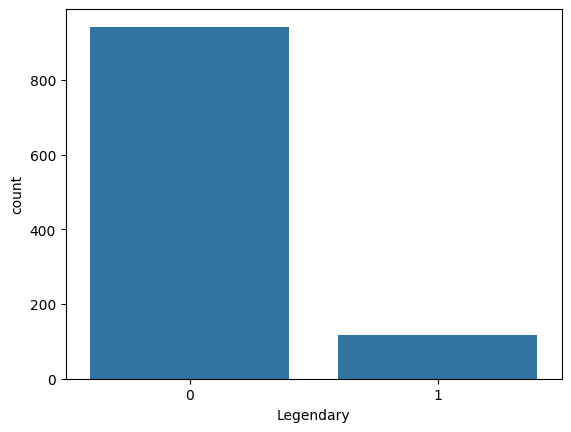

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=pokemon_df, x='Legendary')
plt.show()


##### 2.2.4.2 Visualización de la correlación entre las variables

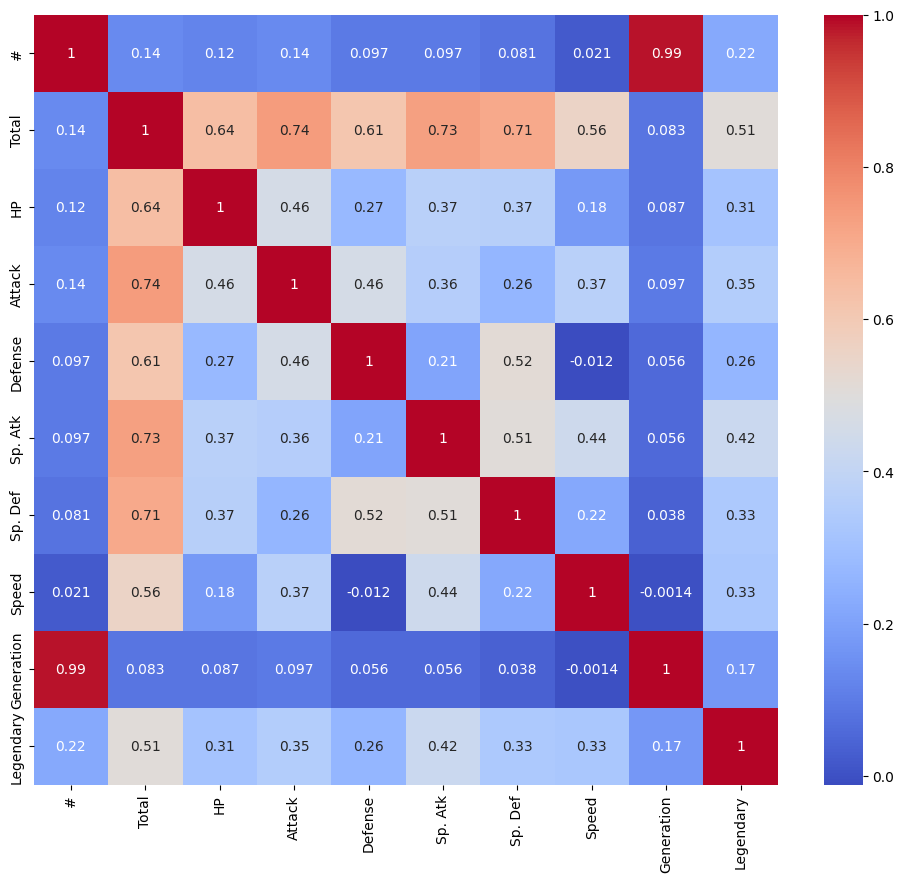

In [43]:
# Para este heatmap, excluimos las columnas de codificación One-Hot para una visualización más clara
cols_to_include = ['#', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']
plt.figure(figsize=(12, 10))
sns.heatmap(pokemon_df[cols_to_include].corr(), annot=True, cmap='coolwarm')
plt.show()

##### 2.2.4.3 Visualización de la distribución de los tipos de pokémones

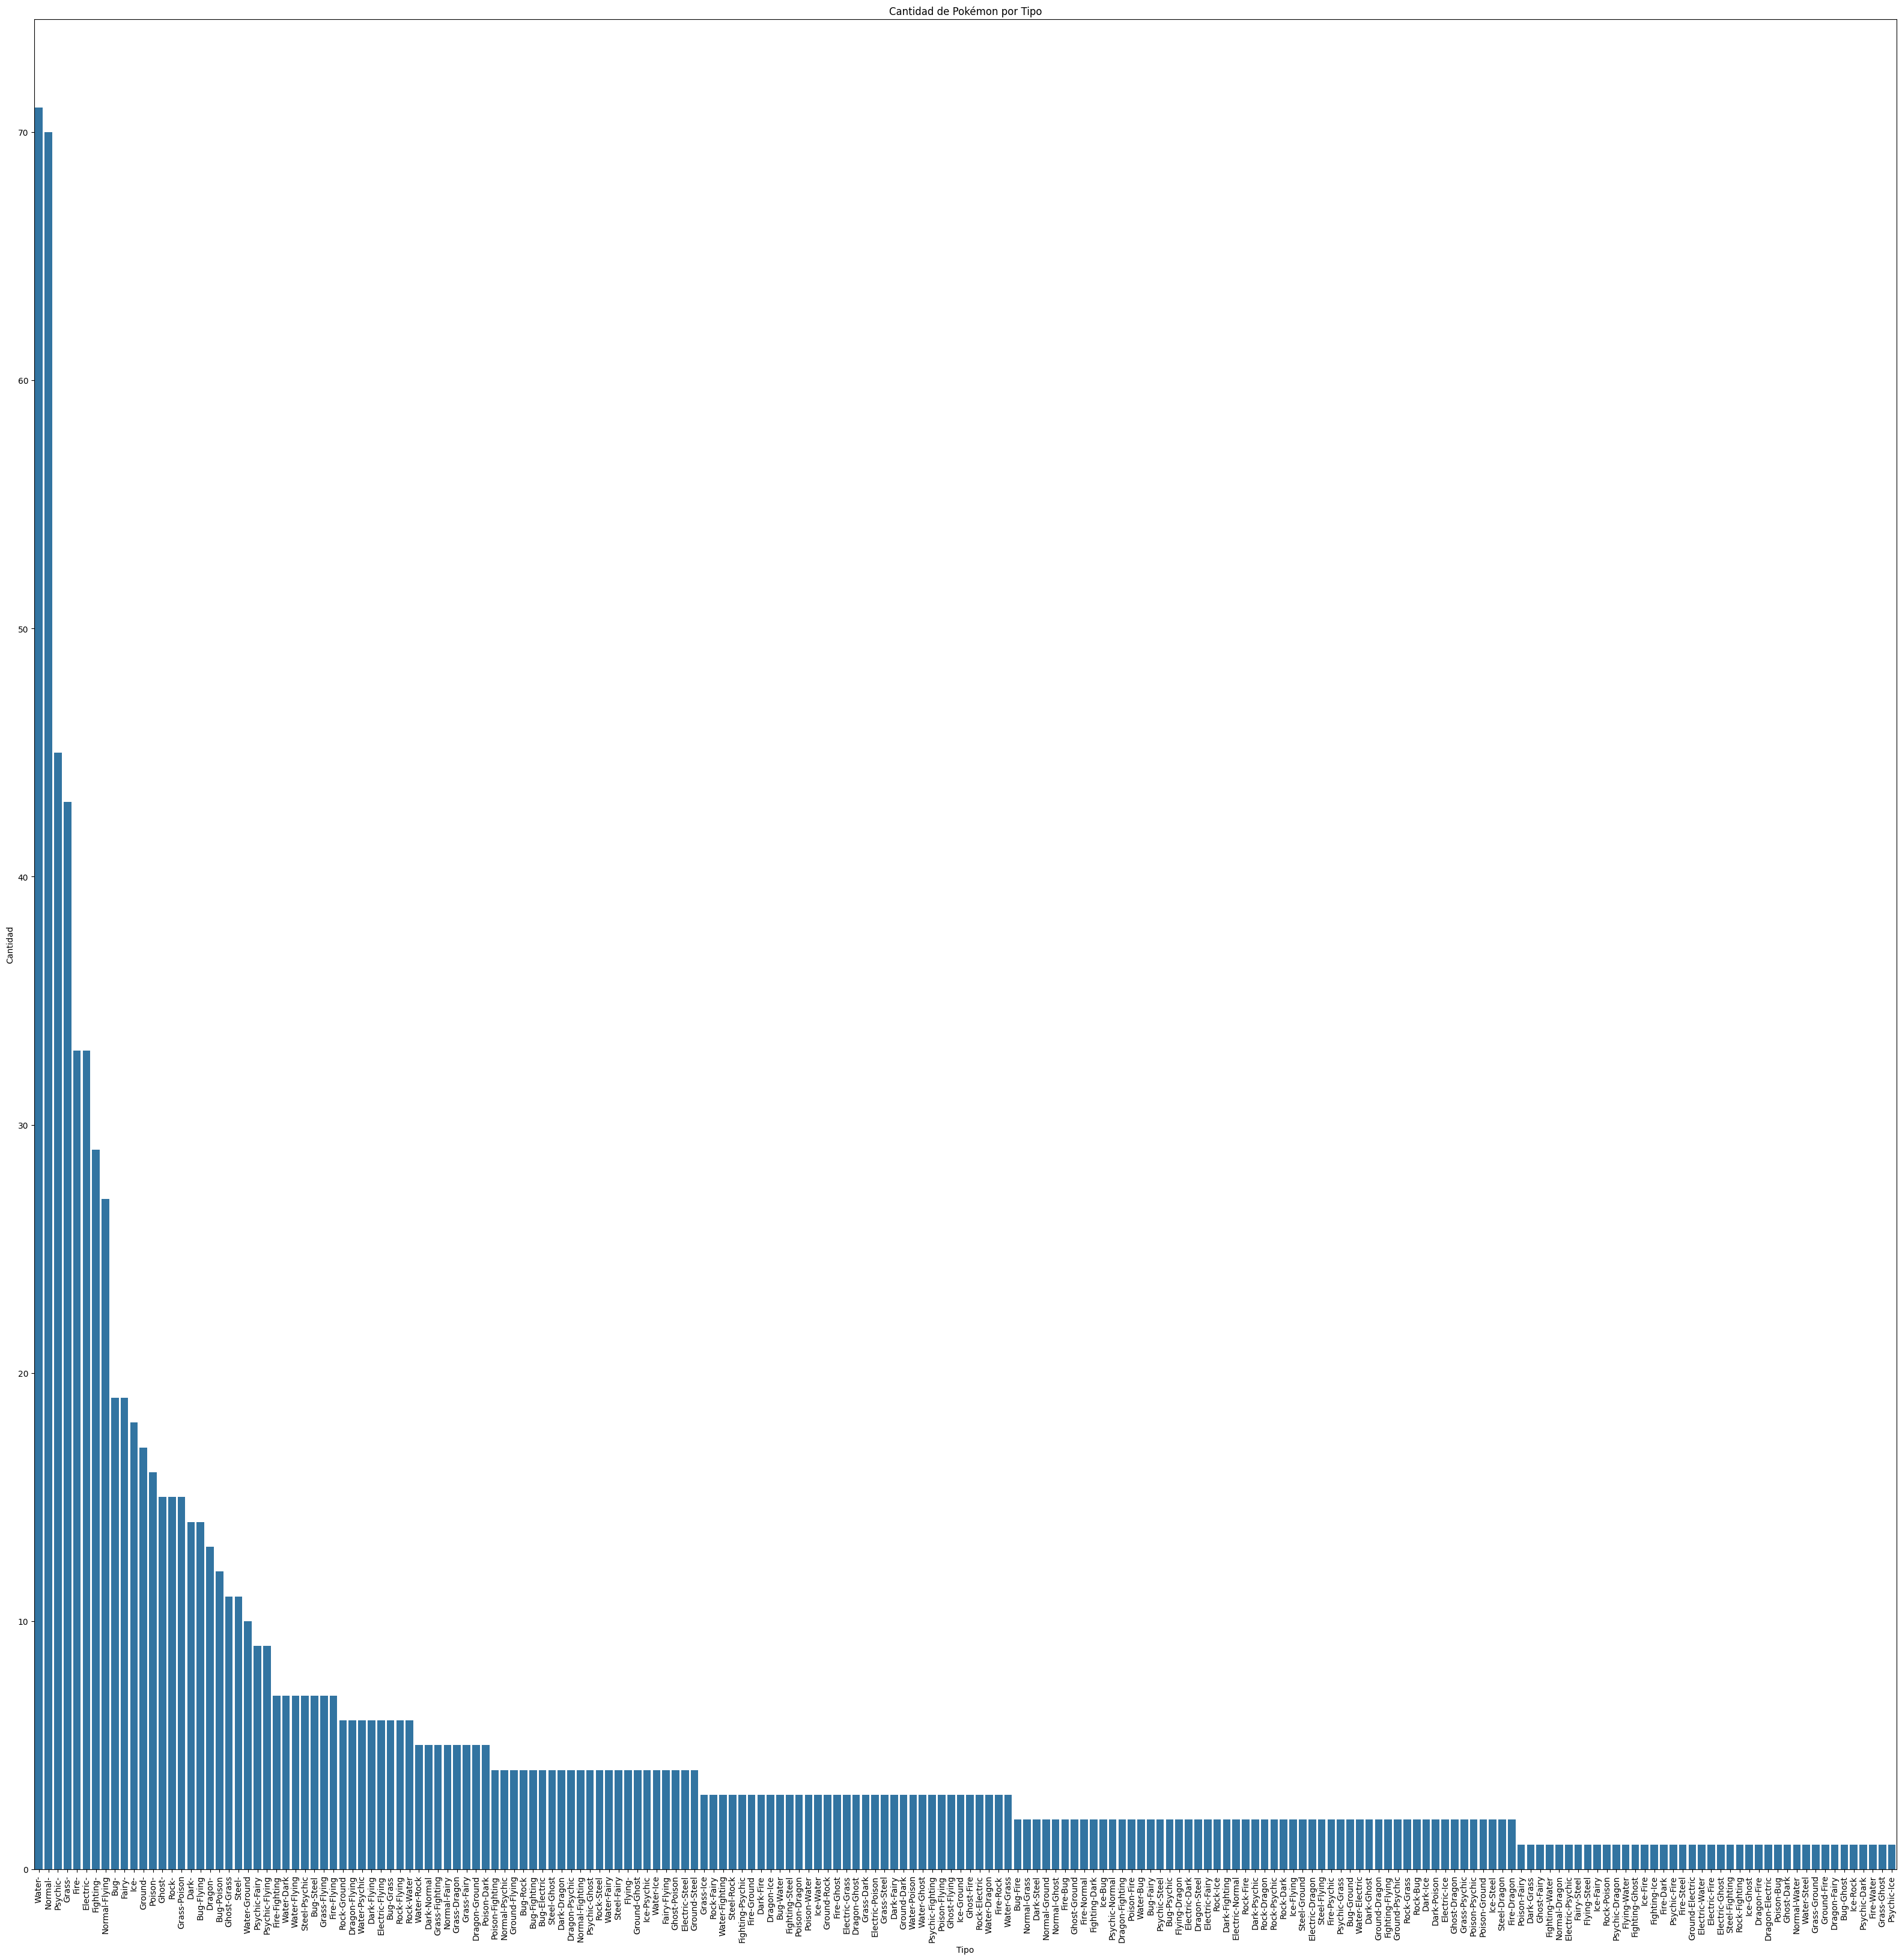

In [48]:
# Cargar una version del dataset orginal
original_df = pd.read_csv('./data/Pokemon.csv')

#  Crear una nueva columna para combinar 'Type 1' y 'Type 2'
original_df['Combined_Type'] = original_df['Type 1'] + '-' + original_df['Type 2'].fillna('')

# Obtener el conteo de cada combinación de tipos
type_counts = original_df['Combined_Type'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(40,40))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Cantidad de Pokémon por Tipo')
plt.ylabel('Cantidad')
plt.xlabel('Tipo')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor visualización
plt.show()


### 2.3 Aplicar reducción de características

#### 2.3.1 Selección de Características

**¿Qué es?**: 
La selección de características es un proceso mediante el cual seleccionas un subconjunto de las características (o variables) más relevantes o significativas de tu conjunto de datos.

**Propósito:**
- **Reducir la complejidad del modelo:** Reducir el número de características puede simplificar tu modelo, haciendo que sea más fácil de entender e interpretar.
- **Mejorar el rendimiento del modelo:** Eliminando características irrelevantes o menos importantes, puedes mejorar el rendimiento de tu modelo, ya que hay menos ruido en los datos.
- **Reducir el tiempo de entrenamiento:** Con menos características, el modelo se entrena más rápido.

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Definir los datos y la etiqueta
X = pokemon_df.drop(columns=['#', 'Name', 'Legendary'])
y = pokemon_df['Legendary']

# Crear el modelo
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Obtener importancias de características
feature_importances = rf.feature_importances_

# Crear un modelo para seleccionar características
sfm = SelectFromModel(rf, threshold=0.05) 
sfm.fit(X, y)
selected_features = X.columns[sfm.get_support()]

print('Características seleccionadas:', selected_features)

Características seleccionadas: Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation'],
      dtype='object')


#### 2.3.2 Reducción de Dimensionalidad (PCA):

**¿Qué es?**
PCA (Principal Component Analysis o Análisis de Componentes Principales) es una técnica de reducción de dimensionalidad que proyecta los datos en un nuevo espacio de características de menor dimensión, manteniendo la mayor cantidad de varianza posible.

**Propósito:**
- **Visualización de datos:** Al reducir la dimensionalidad a 2 o 3, puedes visualizar los datos en un gráfico.
- **Reducir ruido:** Al mantener solo las componentes principales que capturan la mayoría de la varianza, puedes reducir el ruido en los datos.
- **Mejorar el rendimiento del modelo:** Al igual que la selección de características, la reducción de la dimensionalidad puede mejorar el rendimiento del modelo.

In [58]:
from sklearn.decomposition import PCA

# Establecer el número de componentes
pca = PCA(n_components=0.95) 
X_pca = pca.fit_transform(X)

print('Varianza explicada por cada componente:', pca.explained_variance_ratio_)

Varianza explicada por cada componente: [0.84947531 0.0533376  0.03875042 0.02649063]


Esto significa que: 
1. La **primera componente principal** explica aproximadamente el 84.95% de la varianza.
2. La **segunda componente principal** explica aproximadamente el 5.33% de la varianza.
3. La **tercera componente principal** explica aproximadamente el 3.88% de la varianza.
4. La **cuarta componente principal** explica aproximadamente el 2.65% de la varianza.

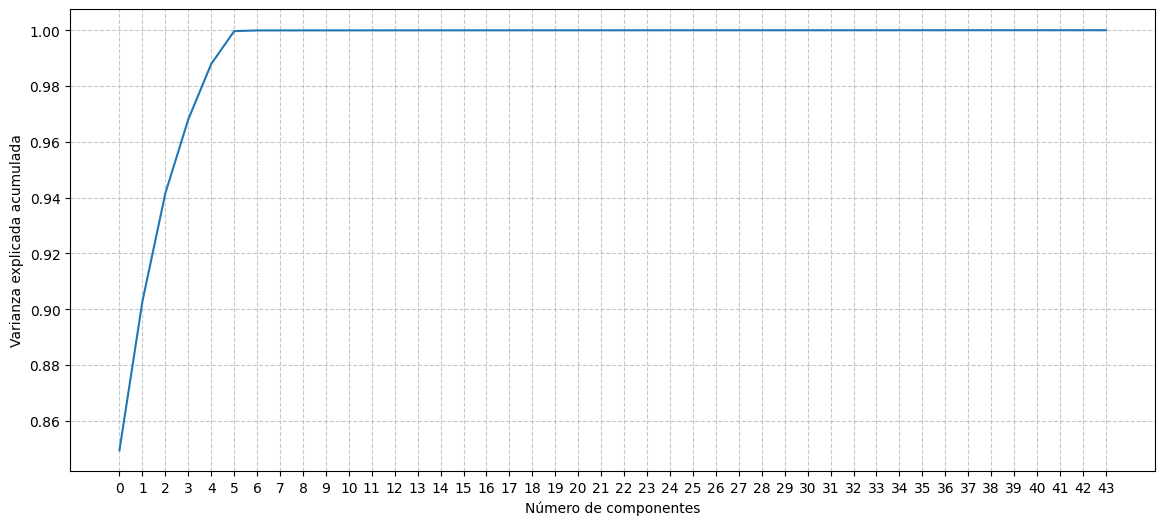

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

plt.figure(figsize=(14, 6))

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')

# Establecer los ticks del eje X para que vayan de 1 en 1
plt.xticks(np.arange(0, len(pca.explained_variance_ratio_), step=1))

# Agregar una grilla
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


## 3. Primer análisis de Clasificación

## 4. Segundo análisis de Clasificación

## 5. Tercer análisis de Clasificación

## 6. Conclusiones

## 7. Predicciones